# Project Presentation - Group 2 | Dataset: DonorsChoose.org 

<div class="alert alert-block alert-info"> DonorsChoose.org is a United States–based nonprofit organization that allows individuals to donate directly to public school classroom projects. It has raised $685 million for America's classrooms. Teachers at three-quarters of all the public schools in the U.S. have come to DonorsChoose.org to request what their students need, making DonorsChoose.org the leading platform for supporting public education.

To date, 3 million people and partners have funded 1.1 million DonorsChoose.org projects. But teachers still spend more than a billion dollars of their own money on classroom materials. To get students what they need to learn, the team at DonorsChoose.org needs to be able to connect donors with the projects that most inspire them. </div>

### Data Source: https://www.kaggle.com/donorschoose/io


### DonorsChoose datasets:
* Donations.csv
* Donors.csv
* Projects.csv
* Resources.csv
* Schools.csv
* Teachers.csv

In [1]:
# Print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import datetime as dt
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.offline.init_notebook_mode(connected=True)
%matplotlib inline
import plotly.plotly as py


# sklearn imports
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


/Users/satishkandimalla/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [3]:
# Reading files:

df_Donations = pd.read_csv("Donations.csv")
df_Donors = pd.read_csv("Donors.csv")
df_Projects = pd.read_csv("Projects.csv")
df_Resources = pd.read_csv("Resources.csv")
df_Schools = pd.read_csv("Schools.csv")
df_Teachers = pd.read_csv("Teachers.csv")

In [4]:
# Method to Change the columns names:

def change_columns(df):
    df.columns = [c.replace(' ', '_') for c in df.columns]
    return df

In [5]:
#to change the column names:

df_Donations= change_columns(df_Donations)
df_Donors= change_columns(df_Donors)
df_Projects= change_columns(df_Projects)
df_Resources= change_columns(df_Resources)
df_Schools= change_columns(df_Schools)
df_Teachers= change_columns(df_Teachers)

# Data cleaning & Data set description 

## 1. Donations.csv

### Data cleaning: df_Donations

In [6]:
df_Donations.head(2)

,Project_ID,Donation_ID,Donor_ID,Donation_Included_Optional_Donation,Donation_Amount,Donor_Cart_Sequence,Donation_Received_Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23


In [7]:
df_Donations['Optional_Donation'] = df_Donations.Donation_Included_Optional_Donation.replace({'No':0.0, 'Yes':1.0})
df_Donations = df_Donations.drop(columns = 'Donation_Included_Optional_Donation')

In [8]:
def date(df):
    df = df.copy()
    df['Year']=pd.DatetimeIndex(df['Donation_Received_Date']).year
    df['Month']=pd.DatetimeIndex(df['Donation_Received_Date']).month
    df['Date']=pd.DatetimeIndex(df['Donation_Received_Date']).day
    df['Day']=pd.to_datetime(df['Donation_Received_Date']).dt.weekday_name
    return df
df_Donations= date(df_Donations)

In [9]:
df_Donations.shape

(4687884, 11)

### Data set description: df_Donations


After cleaning, we have a DataFrame df_Donations, which reports the Donation details (one row per Donation). The columns are:
<ul>
<li><b>Project_ID</b>: Unique ID of a project
<li><b>Donation_ID</b>: Unique ID of a donation
<li><b>Donor_ID</b>: Unique ID of a donor
<li><b>Donation_Amount</b>: Total amount donated for a project
<li><b>Donor_Cart_Sequence</b>: Project position on list of desired donations within Cart list.
<li><b>Donation_Received_Date</b>: Date and time on which the donation was recieved
<li><b>Optional_Donation</b>: 0/1 to give 15% of donation amount to Donoschoose
<li><b>Year</b>: Year on which the donation was recieved
<li><b>Month</b>: Month on which the donation was recieved
<li><b>Date</b>: Date on which the donation was recieved
<li><b>Day</b>: Day on which the donation was recieved
</ul>

In [10]:
df_Donations.head(2)

,Project_ID,Donation_ID,Donor_ID,Donation_Amount,Donor_Cart_Sequence,Donation_Received_Date,Optional_Donation,Year,Month,Date,Day
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,178.37,11,2016-08-23 13:15:57,0.0,2016,8,23,Tuesday
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,25.00,2,2016-06-06 20:05:23,1.0,2016,6,6,Monday


## 2. Donor.csv

### Data cleaning: df_Donors

In [11]:
df_Donors.head(2)

,Donor_ID,Donor_City,Donor_State,Donor_Is_Teacher,Donor_Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245


In [12]:
df_Donors['Is_Teacher'] = df_Donors.Donor_Is_Teacher.replace({'No':0.0, 'Yes':1.0})
df_Donors = df_Donors.drop(columns = 'Donor_Is_Teacher')

In [13]:
df_Donors.shape

(2122640, 5)

### Data set description: df_Donors
After cleaning, we have a DataFrame df_Donors, which reports the Donor details (one row per Donor). The columns are:
<ul>
<li><b>Donor_ID</b>: Unique ID of a donor
<li><b>Donor_City</b>:The donor’s city.
<li><b>Donor_State</b>: The donor’s state.
<li><b>Donor_Zip</b>: The donor’s zip code (only first 3 digits).
<li><b>Is_Teacher</b>: Whether or not the donor is also a teacher with a DonorsChoose.org teacher account.
</ul>

In [14]:
df_Donors.head()

,Donor_ID,Donor_City,Donor_State,Donor_Zip,Is_Teacher
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,602,0.0
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,245,0.0
2,00002d44003ed46b066607c5455a999a,Winton,California,953,1.0
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,462,0.0
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,075,0.0


## 3. Projects.csv

### Data set description: df_Projects
After cleaning, we have a DataFrame df_Projects, which reports the Donation details (one row per Project). The columns are:
<ul>
<li><b>Project_ID</b>: Unique ID of a project
<li><b>School_ID</b>: Unique ID of a donation
<li><b>Teacher_ID</b>: Unique ID of a donor
<li><b>Teacher_Project_Posted_Sequence</b>: Project Posted position 
<li><b>Project_Type</b>: Project is Led by Teachers or Student or Professional Development
<li><b>Project_Title</b>:Project Title when posted
<li><b>Project_Essay</b>: Project Details
<li><b>Project_Short_Description</b>: Project Description in 50 words
<li><b>Project_Need_Statement</b>: Why there is a need for funding this project.
<li><b>Project_Subject_Category_Tree</b>: Project category.
<li><b>Project_Subject_Subcategory_Tree</b>: Project sub category.
<li><b>Project_Grade_Level_Category</b>: Project intended for which grade.
<li><b>Project_Resource_Category</b>: Project resources needed.
<li><b>Project_Cost</b>: Project cost estimation.
<li><b>Project_Posted_Date</b>: Date when the project was posted.
<li><b>Project_Expiration_Date</b>: Project donation expiration date.
<li><b>Project_Current_Status</b>: Project current status.
<li><b>Project_Fully_Funded_Date</b>: Which day when was project was fully funded.
</ul>

In [15]:
df_Projects.head(3)

,Project_ID,School_ID,Teacher_ID,Teacher_Project_Posted_Sequence,Project_Type,Project_Title,Project_Essay,Project_Short_Description,Project_Need_Statement,Project_Subject_Category_Tree,Project_Subject_Subcategory_Tree,Project_Grade_Level_Category,Project_Resource_Category,Project_Cost,Project_Posted_Date,Project_Expiration_Date,Project_Current_Status,Project_Fully_Funded_Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22


In [16]:
df_Projects.shape

(1110017, 18)

## 4. Resources.csv 

### Data set description: df_Resources
After cleaning, we have a DataFrame df_Resources, which reports the Resources requested details (one row per Project). The columns are:
<ul>
<li><b>Project_ID</b>: Unique ID of a project
<li><b>Resource_Item_Name</b>: The name of the requested item, as it appears on the vendor’s website.
<li><b>Resource_Quantity</b>: The quantity of the requested item.
<li><b>Resource_Unit_Price</b>: The price per unit of the requested item.
<li><b>Resource_Vendor_Name</b>: Name of the vendor.
</ul>

In [17]:
df_Resources.head()

,Project_ID,Resource_Item_Name,Resource_Quantity,Resource_Unit_Price,Resource_Vendor_Name
0,000009891526c0ade7180f8423792063,chair move and store cart,1.0,350.00,NaN
1,00000ce845c00cbf0686c992fc369df4,sony mdr zx100 blk headphones,40.0,12.86,CDW-G
2,00002d44003ed46b066607c5455a999a,"gaiam kids stay-n-play balance ball, grey",4.0,19.00,Amazon Business
3,00002d44003ed46b066607c5455a999a,cf520x - giant comfy pillows - set of 4,1.0,269.00,Lakeshore Learning Materials
4,00002d44003ed46b066607c5455a999a,"serta lounger, mini, sky blue",1.0,131.85,Amazon Business


In [18]:
df_Resources.shape

(7210448, 5)

## 5. Schools.csv

### Data set description: df_Schools
After cleaning, we have a DataFrame df_Schools, which reports the Schools details (one row per School). The columns are:
<ul>
<li><b>School_ID</b>: Unique identifier of a school.
<li><b>School_Name</b>: Name of the school.
<li><b>School_Metro_Type</b>: One of four categories(rural,urban,suburban,unknown) describing metro type, or urbanicity, of school area.
<li><b>School_Percentage_Free_Lunch</b>: Integer describing percentage of students qualifying for free or reduced lunch, obtained from NCES data. For schools without NCES data, a district average is used.
<li><b>School_State</b>: The state of the school that the teacher was teaching at at the time the project was posted.
<li><b>School_Zip</b>: The zip code of the school that the teacher was teaching at at the time the project was posted.
<li><b>School_City</b>: The city of the school that the teacher was teaching at at the time the project was posted.
<li><b>School_County</b>: The county of the school that the teacher was teaching at at the time the project was posted.
<li><b>School_District</b>: The district of the school that the teacher was teaching at at the time the project was posted.
</ul>

In [19]:
df_Schools.head()

,School_ID,School_Name,School_Metro_Type,School_Percentage_Free_Lunch,School_State,School_Zip,School_City,School_County,School_District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


In [20]:
df_Schools.shape

(72993, 9)

## 6. Teachers.csv

### Data cleaning: df_Teachers

### Data set description: df_Teachers
After cleaning, we have a DataFrame df_Resources, which reports the Resources requested details (one row per Project). The columns are:
<ul>
<li><b>Teacher_ID</b>: Unique identifier of a teacher.
<li><b>Teacher_Prefix</b>: “Mrs.”, “Ms.”, “Mr.”, “Teacher” (gender neutral option) chosen by teacher during account creation.
<li><b>Teacher_First_Project_Posted_Date</b>: Date on which the teacher’s first project was posted.
</ul>

In [21]:
df_Teachers.head()

,Teacher_ID,Teacher_Prefix,Teacher_First_Project_Posted_Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
2,00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
3,0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
4,0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10


In [22]:
df_Teachers.shape

(402900, 3)

# Remove rows in the datasets that cannot be mapped 

In [23]:
df_Projects = df_Projects.loc[df_Projects['School_ID'].isin(df_Schools['School_ID'])]
df_Projects = df_Projects.loc[df_Projects['Project_ID'].isin(df_Resources['Project_ID'])]
df_Donations = df_Donations.loc[df_Donations['Project_ID'].isin(df_Projects['Project_ID'])]
df_Donations = df_Donations.loc[df_Donations['Donor_ID'].isin(df_Donors['Donor_ID'])]
df_Donors = df_Donors.loc[df_Donors['Donor_ID'].isin(df_Donations['Donor_ID'])]

## Check missing data

In [24]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [25]:
missing_data(df_Donations)

,Total,Percent
Day,0,0.0
Date,0,0.0
Month,0,0.0
Year,0,0.0
Optional_Donation,0,0.0
Donation_Received_Date,0,0.0
Donor_Cart_Sequence,0,0.0
Donation_Amount,0,0.0
Donor_ID,0,0.0
Donation_ID,0,0.0


In [26]:
missing_data(df_Donors)

,Total,Percent
Donor_City,206747,10.320868
Donor_Zip,175614,8.766700
Is_Teacher,0,0.000000
Donor_State,0,0.000000
Donor_ID,0,0.000000


In [27]:
missing_data(df_Projects)

,Total,Percent
Project_Fully_Funded_Date,283244,25.517409
Project_Resource_Category,36,0.003243
Project_Subject_Subcategory_Tree,29,0.002613
Project_Subject_Category_Tree,29,0.002613
Project_Expiration_Date,14,0.001261
Project_Title,6,0.000541
Project_Short_Description,3,0.000270
Project_Need_Statement,3,0.000270
Project_Essay,1,0.000090
Project_Grade_Level_Category,0,0.000000


In [28]:
missing_data(df_Resources)

,Total,Percent
Resource_Vendor_Name,81994,1.137155
Resource_Unit_Price,24310,0.337150
Resource_Quantity,24299,0.336997
Resource_Item_Name,561,0.007780
Project_ID,0,0.000000


In [29]:
missing_data(df_Schools)

,Total,Percent
School_Percentage_Free_Lunch,1141,1.563164
School_City,227,0.310989
School_County,2,0.002740
School_District,0,0.000000
School_Zip,0,0.000000
School_State,0,0.000000
School_Metro_Type,0,0.000000
School_Name,0,0.000000
School_ID,0,0.000000


In [30]:
missing_data(df_Teachers)

,Total,Percent
Teacher_Prefix,28,0.00695
Teacher_First_Project_Posted_Date,0,0.00000
Teacher_ID,0,0.00000


There is no missing data in donations and only a very small percent of Teacher Prefix in teachers are missing. 10% of Donor City and 8% from Donor Zip is missing from donors. 25% of Project Fully Funded Date from projects are missing. From schools, 1.5% of School Percentage Free Lunch are missing.

**Any of these missing data doesn't affect our  further analysis**

# Let us see some interesting findings...

# Insight 1: Projects and their Donations

### Analysing Project.csv

In [31]:
df_Projects.head(2)

,Project_ID,School_ID,Teacher_ID,Teacher_Project_Posted_Sequence,Project_Type,Project_Title,Project_Essay,Project_Short_Description,Project_Need_Statement,Project_Subject_Category_Tree,Project_Subject_Subcategory_Tree,Project_Grade_Level_Category,Project_Resource_Category,Project_Cost,Project_Posted_Date,Project_Expiration_Date,Project_Current_Status,Project_Fully_Funded_Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN


#### Cleaning the data in the Project_title


In [32]:
#Open stop.txt file in read mode and convert all the letters into lower case
stop=open('stop.txt', 'r')
#Read the file and convert all the letters to lowercase.
stop1=stop.read().lower()
#close the file
stop.close()
#split the string into words and store as a list
stop_list=stop1.split()

In [33]:
#function for cleaning
import string

def clean_text(txt):
    # lower case
    txt = str(txt).lower()

    # punctuation removal 
    txt = ''.join(x for x in txt if x not in string.punctuation)

    # stopwords and lemmatization
    clean_txt = ""
    for word in txt.split():
        if word in stop_list:
            continue 
        clean_txt += " "
        clean_txt += word 
        
    noise = ['title','students','would', 'will','donotremoveessaydivider']
    for ns in noise:
        clean_txt = clean_txt.replace(ns, "")
        
    return clean_txt

In [34]:
#creating a column for the cleaned Project_Title
df_Projects['Cleaned_Project_Title']=df_Projects['Project_Title'].apply(clean_text)


In [35]:
#considering cleaned Project_Title of expired projects
df_Ptitle_expired=df_Projects.Cleaned_Project_Title[df_Projects['Project_Current_Status']=='Expired']
#considering cleaned Project_Title of fully funded projects
df_Ptitle_funded=df_Projects.Cleaned_Project_Title[df_Projects['Project_Current_Status']=='Fully Funded']


INSTALL WORDCLOUD: conda install -c conda-forge wordcloud 

### WORDCLOUD ANALYSIS: Fully Funded Projects


<Figure size 1080x576 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

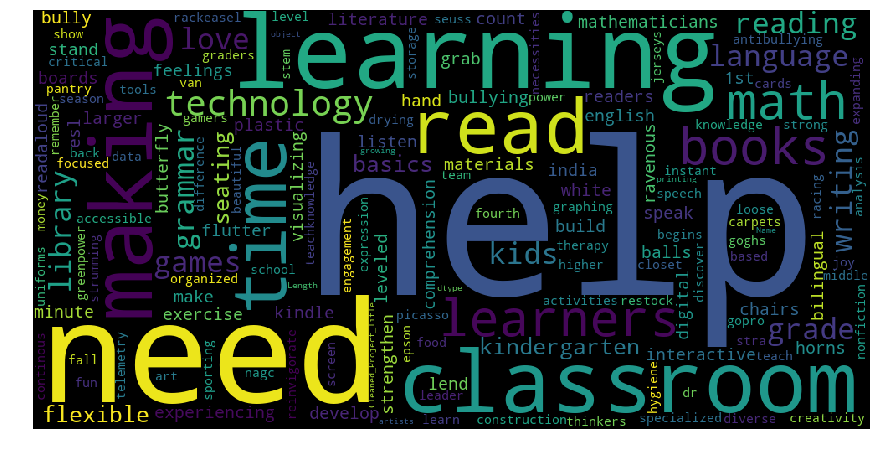

In [36]:
from wordcloud import WordCloud
wc_funded = WordCloud(width = 1000, height = 500).generate(str(df_Ptitle_funded))
plt.figure(figsize=(15,8))
plt.imshow(wc_funded)
plt.axis("off")
plt.show()

### WORDCLOUD ANALYSIS: Expired Projects


<Figure size 1080x576 with 0 Axes>

(-0.5, 999.5, 499.5, -0.5)

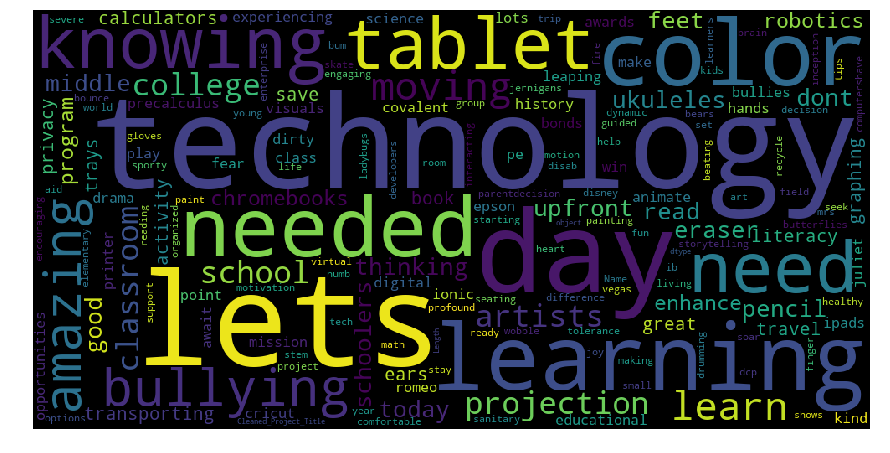

In [37]:
from wordcloud import WordCloud
wc_expired = WordCloud(width = 1000, height = 500).generate(str(df_Ptitle_expired))
plt.figure(figsize=(15,8))
plt.imshow(wc_expired)
plt.axis("off")
plt.show()

## Observation: 

**It is observed that most popular keywords used in fully funded projects were "help" and "need". We can consider these keywords attract the donor most. Moreover, in expired projects, "help" and "need" are not used much.** 

We can suggest that including "help" and "need" in project tiltle, increases the chance of getting fully funded. 


## Let's analyse the impact of Project_Grade_Level_Category, Project_Cost and Project_Subject_Category_Tree on donations

### Data Preparation steps:

In [38]:
df_Donations.head(2)

,Project_ID,Donation_ID,Donor_ID,Donation_Amount,Donor_Cart_Sequence,Donation_Received_Date,Optional_Donation,Year,Month,Date,Day
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,178.37,11,2016-08-23 13:15:57,0.0,2016,8,23,Tuesday
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,25.00,2,2016-06-06 20:05:23,1.0,2016,6,6,Monday


In [39]:
#calculation of no. of donors and total donation amount for each project in df_Donations
df_Project_donations=df_Donations.groupby('Project_ID').agg({'Donor_ID':'size','Donation_Amount':'sum'}).reset_index().rename(columns=({'Donor_ID':'No_of_donors', 'Donation_Amount':'Total_donation_amount'}))

In [40]:
df_Project_donations.head(2)

,Project_ID,No_of_donors,Total_donation_amount
0,000009891526c0ade7180f8423792063,6,288.37
1,00000ce845c00cbf0686c992fc369df4,7,485.00


In [41]:
#merge df_Projects with df_Project_donations to get no. of donors 
#and total donation amount for each project in df_Projects
df_Project_merge=df_Projects.merge(df_Project_donations,how='left')

In [42]:
#remove live projects
df_Projects_Status=df_Project_merge[df_Project_merge.Project_Current_Status!='Live']

In [43]:
# Grouping by Project_Grade_Level_Category
df_Grade=df_Projects_Status.groupby(['Project_Grade_Level_Category','Project_Current_Status']).agg({'Project_ID':'size', 'Project_Cost':'mean', 'No_of_donors':'sum', 'Total_donation_amount':'sum'}).reset_index().rename(columns=({'Project_ID':'No_of_Projects'}))

In [44]:
def tosort(val):
    if val=='Grades PreK-2':
        return 1
    elif val == 'Grades 3-5':
        return 2
    elif val == 'Grades 6-8':
        return 3
    elif val == 'Grades 9-12':
        return 4
    else:
        return 5

In [45]:
# Sorting for better visualisation
df_Grade['Project_Grade_Level_Category_sort'] = df_Grade.Project_Grade_Level_Category.apply(tosort)


In [46]:
df_Grade=df_Grade.sort_values(by=['Project_Grade_Level_Category_sort','Project_Current_Status'], ascending=[True, False]).reset_index()

In [47]:
df_Grade.drop(columns = ['index','Project_Grade_Level_Category_sort'],inplace=True)
df_Grade

,Project_Grade_Level_Category,Project_Current_Status,No_of_Projects,Project_Cost,No_of_donors,Total_donation_amount
0,Grades PreK-2,Fully Funded,323877,563.452010,1608577.0,9.183386e+07
1,Grades PreK-2,Expired,91102,879.396248,141563.0,5.358127e+06
2,Grades 3-5,Fully Funded,269454,617.895116,1382857.0,8.305410e+07
3,Grades 3-5,Expired,80386,1013.048270,130792.0,5.243359e+06
4,Grades 6-8,Fully Funded,134046,726.034741,679137.0,4.534579e+07
5,Grades 6-8,Expired,40878,1228.052324,69573.0,3.018258e+06
6,Grades 9-12,Fully Funded,99345,875.868537,500118.0,4.319212e+07
7,Grades 9-12,Expired,29012,1392.184355,51413.0,2.481694e+06
8,unknown,Fully Funded,37,789.276486,126.0,1.040242e+04
9,unknown,Expired,16,946.731875,23.0,8.644300e+02


### Project_Grade_Level_Category VS Project_Current_Status

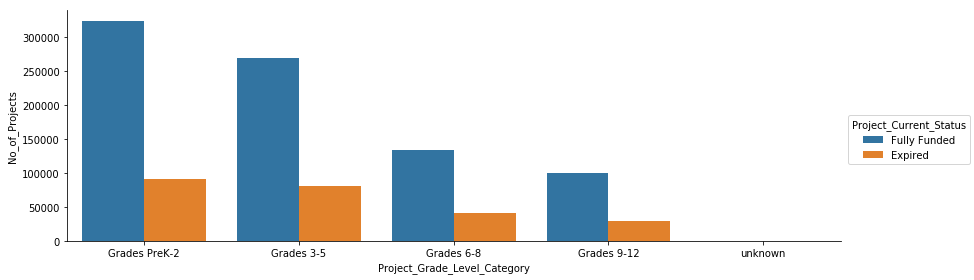

In [48]:
sns.factorplot(x='Project_Grade_Level_Category', y='No_of_Projects',hue='Project_Current_Status', data=df_Grade, \
               kind='bar',aspect=3)



** It is observed that lower grades have more fully funded projects than higher grades. So
projects from lower grades are more likely to be funded than projects from higher grades.**

### No_of_donors for each Project_Grade_Level_Category

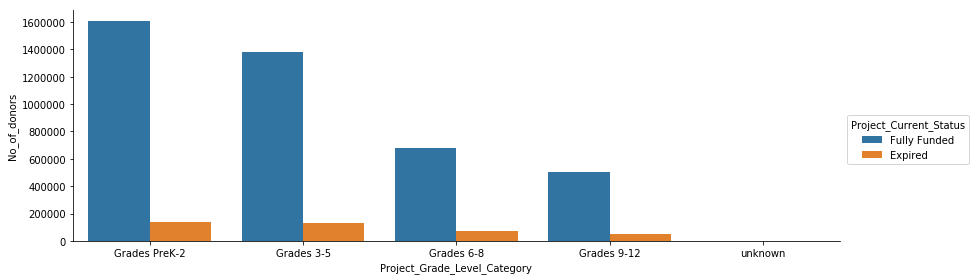

In [49]:
sns.factorplot(x='Project_Grade_Level_Category', y='No_of_donors',hue='Project_Current_Status', data=df_Grade, \
               kind='bar',aspect=3)


** It is observed that number of donor for lower grades very high compared to higher grades.**

### Total_donation_amount for each Project_Grade_Level_Category

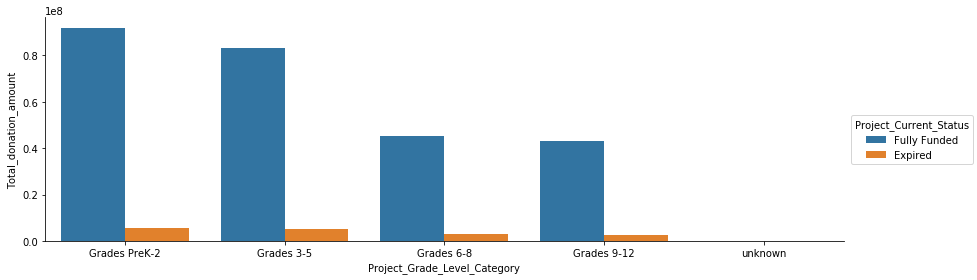

In [50]:
sns.factorplot(x='Project_Grade_Level_Category', y='Total_donation_amount',hue='Project_Current_Status', data=df_Grade, \
               kind='bar',aspect=3)### No_of_donors for each Project_Grade_Level_Category

** Similary, total donation amount lower grades very high compared to higher grades.**

## Lets see why?

### Impact of Project_Cost 

In [51]:
df_project_cost=df_Projects_Status.groupby('Project_Current_Status')['Project_Cost'].mean().reset_index()
df_project_cost

,Project_Current_Status,Project_Cost
0,Expired,1044.579312
1,Fully Funded,645.106825


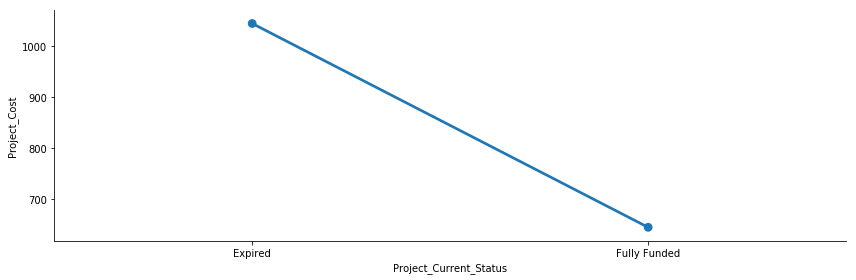

In [52]:
sns.factorplot(x='Project_Current_Status', y='Project_Cost', data=df_project_cost, \
              aspect=3)

**Here we can see that the average project cost of expired projects are very high whereas average project cost of fully funded projects are very low. So the projects with low project cost are more likely to get funded.**

### Average Project_Cost each Project_Grade_Level_Category

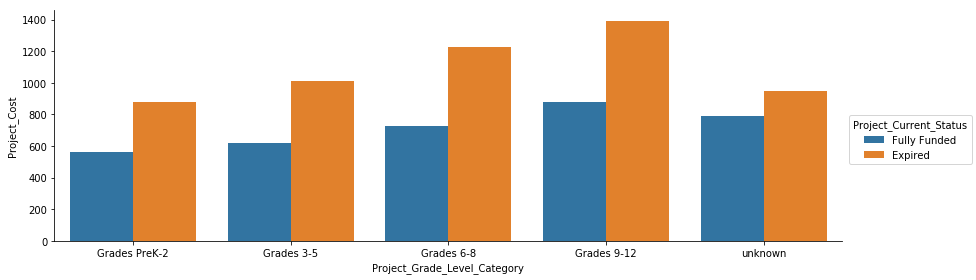

In [53]:
sns.factorplot(x='Project_Grade_Level_Category', y='Project_Cost',hue='Project_Current_Status', data=df_Grade, \
               kind='bar',aspect=3)



### Here we found that  lower grades have more fully funded projects, no of donor and donation amount because project cost is low. As the grade increases donations received decreases because the project cost increases.

## Analyzing Project_Subject_Category_Tree

In [54]:
#considering only fully funded projects
df_funded=df_Projects_Status[df_Projects_Status.Project_Current_Status=='Fully Funded']


In [55]:
#Grouping by Project_Subject_Category_Tree
df_Category=df_funded.groupby(['Project_Subject_Category_Tree','Project_Current_Status']).agg({'Project_ID':'size','Project_Cost':'mean','No_of_donors':'sum'}).reset_index().rename(columns=({'Project_ID':'No_of_Projects'}))


In [56]:
df_Category.head(10)

,Project_Subject_Category_Tree,Project_Current_Status,No_of_Projects,Project_Cost,No_of_donors
0,Applied Learning,Fully Funded,32110,647.552580,165855.0
1,"Applied Learning, Health & Sports",Fully Funded,5106,707.020221,30693.0
2,"Applied Learning, History & Civics",Fully Funded,2438,1041.948060,15346.0
3,"Applied Learning, Literacy & Language",Fully Funded,22813,613.549223,121641.0
4,"Applied Learning, Math & Science",Fully Funded,9796,713.062286,50417.0
5,"Applied Learning, Music & The Arts",Fully Funded,8024,675.338384,45595.0
6,"Applied Learning, Special Needs",Fully Funded,15245,598.854923,82284.0
7,"Applied Learning, Warmth, Care & Hunger",Fully Funded,27,578.782963,218.0
8,Health & Sports,Fully Funded,37860,771.262115,156872.0
9,"Health & Sports, Applied Learning",Fully Funded,1233,591.931695,7133.0


In [57]:
#considering only top 5 Project_Subject_Category_Tree
df_sort=df_Category.sort_values(by=['No_of_Projects'], ascending=False).head()
df_sort.head()

,Project_Subject_Category_Tree,Project_Current_Status,No_of_Projects,Project_Cost,No_of_donors
24,Literacy & Language,Fully Funded,186961,536.937634,909203.0
32,Math & Science,Fully Funded,128580,729.340055,579386.0
28,"Literacy & Language, Math & Science",Fully Funded,108607,667.078523,569470.0
40,Music & The Arts,Fully Funded,43286,701.457618,284383.0
8,Health & Sports,Fully Funded,37860,771.262115,156872.0


### Top 5 Project_Subject_Category_Tree that are fully funded

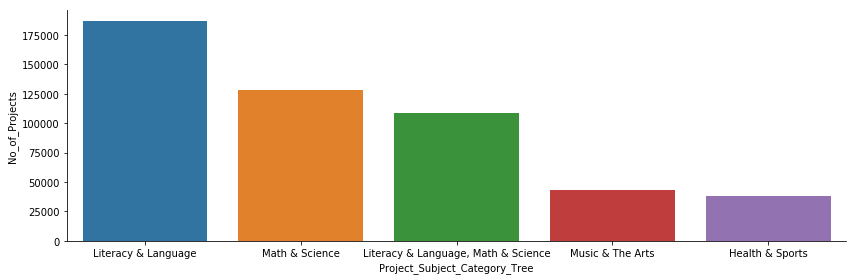

In [58]:
sns.factorplot(x='Project_Subject_Category_Tree', y='No_of_Projects', data=df_sort, \
               kind='bar',aspect=3)



### Number of donors for top 5 Project_Subject_Category_Tree 

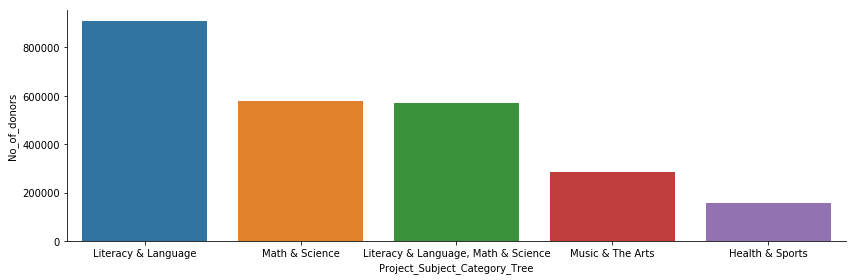

In [59]:
sns.factorplot(x='Project_Subject_Category_Tree', y='No_of_donors', data=df_sort, \
               kind='bar',aspect=3)

### Analyzing project cost of these top 5 Project_Subject_Category_Tree 

In [60]:
df_cost=df_Category.copy()

In [61]:
df_cost['discretized_Project_Cost_EW']=pd.cut(df_cost.Project_Cost, 5)

In [62]:
df_cost_sort=df_cost.sort_values(by=['No_of_Projects'], ascending=False).head()

### Average Project_Cost of top 5 Project_Subject_Category_Tree

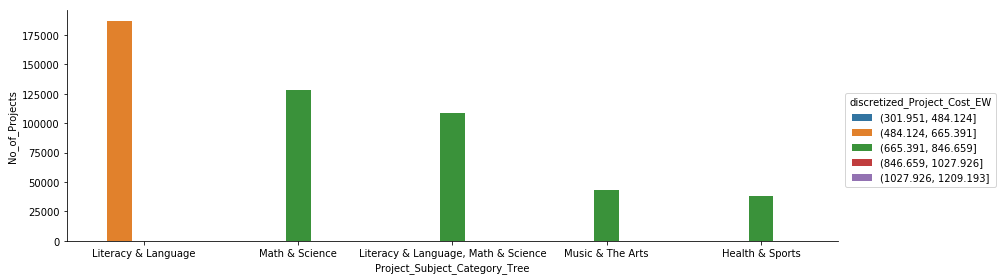

In [63]:
sns.factorplot(x='Project_Subject_Category_Tree', y='No_of_Projects',hue='discretized_Project_Cost_EW', data=df_cost_sort, \
               kind='bar',aspect=3)


** Most of the top 5 Project Subject Categories are of low - moderate cost which is actually the average post cost of fully funded projects.**

In [64]:
#grouping by Project_Grade_Level_Category and Project_Subject_Category_Tree
df_final=df_funded.groupby('Project_Grade_Level_Category').apply(lambda a: a.groupby('Project_Subject_Category_Tree').size().nlargest(5)).reset_index().rename(columns=({0:'No_of_funded_Projects'}))

In [65]:
#sorting for better visualisation
def tosort(val):
    if val=='Grades PreK-2':
        return 1
    elif val == 'Grades 3-5':
        return 2
    elif val == 'Grades 6-8':
        return 3
    elif val == 'Grades 9-12':
        return 4
    else:
        return 5

In [66]:
df_final['Project_Grade_Level_Category_sort']= df_final.Project_Grade_Level_Category.apply(tosort)

In [67]:
df_final1=df_final.sort_values(by=['Project_Grade_Level_Category_sort','No_of_funded_Projects'], ascending=[True, False]).reset_index()


In [68]:
df_final1.head()

,index,Project_Grade_Level_Category,Project_Subject_Category_Tree,No_of_funded_Projects,Project_Grade_Level_Category_sort
0,15,Grades PreK-2,Literacy & Language,80776,1
1,16,Grades PreK-2,"Literacy & Language, Math & Science",66423,1
2,17,Grades PreK-2,Math & Science,32293,1
3,18,Grades PreK-2,Applied Learning,15359,1
4,19,Grades PreK-2,"Applied Learning, Literacy & Language",13485,1


### Top 5 fully funded Project Subject Categories for each Grade level

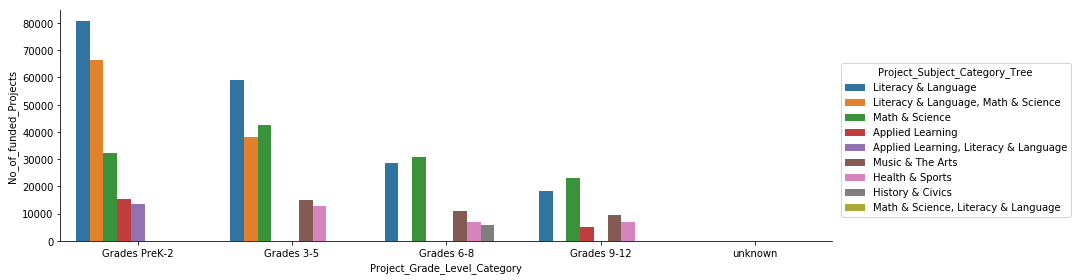

In [69]:
sns.factorplot(x='Project_Grade_Level_Category', y='No_of_funded_Projects',hue='Project_Subject_Category_Tree', data=df_final1, \
               kind='bar',aspect=3)

**All grades have projects of 'Literacy & Language' and 'Math & Science' most but lower grades have higher count compared to higher grades. Moreover project with 'Literacy & Language, Math & Science' combination which is the 3rd highest in top 5 Project_Subject_Category_Tree is covered by lower grade but higher grades don't focus much on this topics.**

# Conclusion:

### Overall, Post Cost and Project_Subject_Category  affect donation, lower grades get more donation as thier project cost is less and they focus on popular project subject categories. Whereas, higher grades project cost are high and doesnt cover popular project subject categories much. Also for higher grades, numbers of projects posted is also less compared to lower grades.

# Machine learning

### Preparing data

In [70]:
Train_df=df_Projects_Status[['Project_Current_Status','Project_Cost','Project_Grade_Level_Category']]


In [71]:
Train_df=pd.get_dummies(data=Train_df,columns=['Project_Grade_Level_Category'])


In [72]:
Train_df.rename({'Project_Grade_Level_Category_Grades 3-5' \
               : 'Grades 3-5', 'Project_Grade_Level_Category_Grades 6-8' \
               : 'Grades 6-8','Project_Grade_Level_Category_Grades 9-12' \
               : 'Grades 9-12','Project_Grade_Level_Category_Grades PreK-2' \
               : 'Grades PreK-2','Project_Grade_Level_Category_unknown' \
               : 'unknown','Project_Current_Status_Expired' \
               : 'Expired','Project_Current_Status_Fully Funded' \
               : 'Funded'},axis=1,inplace=True)


In [73]:
Train_df['Status'] = Train_df.Project_Current_Status.replace({'Fully Funded':1.0, 'Expired':0.0})


In [74]:
Train_df.drop(columns = 'Project_Current_Status',inplace=True)


In [75]:
Train_df.head()
from sklearn.model_selection import train_test_split



,Project_Cost,Grades 3-5,Grades 6-8,Grades 9-12,Grades PreK-2,unknown,Status
0,361.80,0,0,0,1,0,1.0
1,512.85,0,0,0,1,0,0.0
2,435.92,0,0,0,1,0,1.0
3,161.26,1,0,0,0,0,1.0
4,264.19,1,0,0,0,0,1.0


In [76]:
## Split the data set into test and train(30%,70%)
X_train, X_test, Y_train, Y_test = train_test_split(Train_df.drop('Status',axis=1), 
                                                    Train_df['Status'], test_size=0.30, 
                                                    random_state=0)



In [77]:
from sklearn.linear_model import LogisticRegression


In [78]:
## fitting the regression model
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
Y_pred = logmodel.predict(X_test)


In [80]:
## Checking accuracy of the prediction model.
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)


0.7727448618487982

In [81]:
Y_prob = logmodel.predict_proba(X_test)


In [82]:
#AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_prob[:,1])

0.6889769366097076

In [83]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[  1736  70755]
 [  2068 245887]]


# Managerial insights:

**Based on our results we can recommend the following:**

- Use of popular keywords like "help" & "need" in project title that attracts more donors

- The project cost must be reduced especially for higher grades and request more projects for higher grades especially  on 'Literacy & Language, Math & Science' which is a popular project subject to get high donations. 

# Insight 2: State Economy VS Donations

## Data Preparation steps:

### 'School_Percentage_Free_Lunch' represents how wealthy the neighborhood is. 


In [84]:
df_Schools.head(2)

,School_ID,School_Name,School_Metro_Type,School_Percentage_Free_Lunch,School_State,School_Zip,School_City,School_County,School_District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District


In [85]:
schools_give_lunch = df_Schools[['School_Percentage_Free_Lunch', 'School_State','School_Zip','School_City']]

In [86]:
schools_free_lunch_state = (schools_give_lunch.groupby('School_State')['School_Percentage_Free_Lunch']\
                  .describe().sort_values(by='mean', ascending=False))

In [87]:
#states with schools with highest % of free lunch:

schools_free_lunch_state.head()

,count,mean,std,min,25%,50%,75%,max
School_State,,,,,,,,
District of Columbia,155.0,87.845161,18.802853,7.0,95.0,95.0,95.0,99.0
Mississippi,833.0,77.824730,17.696711,10.0,67.0,81.0,95.0,100.0
Louisiana,1192.0,74.325503,18.564561,2.0,62.0,79.0,90.0,100.0
New Mexico,538.0,73.825279,20.635959,1.0,63.0,75.0,95.0,99.0
Oklahoma,1323.0,67.532880,20.165490,3.0,54.5,70.0,83.0,99.0


In [88]:
#states with schools with lowest % of free lunch:

schools_free_lunch_state.tail()

,count,mean,std,min,25%,50%,75%,max
School_State,,,,,,,,
Wyoming,143.0,44.314685,16.156985,14.0,33.0,41.0,53.50,95.0
Vermont,181.0,43.287293,15.621044,13.0,32.0,43.0,54.00,87.0
Utah,864.0,41.422454,20.276216,3.0,27.0,38.0,54.00,99.0
North Dakota,198.0,35.924242,17.642511,3.0,24.0,32.0,45.75,95.0
New Hampshire,296.0,32.520270,19.412723,3.0,17.0,30.5,46.00,95.0


In [89]:
schools_give_lunch_state = schools_free_lunch_state['mean'].round().to_frame().reset_index()
schools_count_give_lunch_state = schools_free_lunch_state['count'].round().to_frame().reset_index()

In [90]:
import plotly
import plotly.plotly as py
from plotly.graph_objs import *

In [91]:
plotly.tools.set_credentials_file(username='Sarahdihan', \
                                  api_key='19EvxucF8g4vxiSOTVM5')

In [92]:
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

schools_give_lunch_state['text'] = schools_give_lunch_state['School_State'].astype(str) + '<br>' +\
    'Avg % of free food : ' + schools_give_lunch_state['mean'].astype(str) + '%'

    
state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
schools_give_lunch_state['State Code'] = schools_give_lunch_state['School_State'].map(state_to_code)

data = [ dict(
        type = 'choropleth',
        locations = schools_give_lunch_state['State Code'],
        z = schools_give_lunch_state['mean'].astype(float),
        text = schools_give_lunch_state['text'],
        locationmode = 'USA-states',
        autocolorscale = False,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
        title = '% of free food')) ]

layout = dict(
        title = 'State wise Schools % free food <br>(Hover for details) ',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-usa-map' )

## Based on % free lunch we categories the states into economically poor or rich

## Poor States:


**The average percentage of free lunch provided by the schools in District of Columbia, Mississippi, Louisiana, New Mexico, Oklahoma states are in between 67% - 87%. Which means  67% - 87% of students financially eligible for free lunch. So we can considered them as poor states.**

## Rich States:

**The average percentage of free lunch provided by the schools in New Hampshire, North Dakota, Utah, Vermont, Wyoming are in between 30% - 45%. So we considered them as rich states. **


# Now lets check the number of donations that these states recieved

In [93]:
plotly.tools.set_credentials_file(username='sdfernandes', \
                                  api_key='v8NkXQLX7Kysu1UFJraL')

In [94]:
top_donation = df_Donors.merge(df_Donations,left_on='Donor_ID',right_on='Donor_ID')
top_donation_states = top_donation[['Donor_State','Donation_Amount']]
top_donation_states_mean = top_donation_states.groupby('Donor_State')['Donation_Amount'].mean().round().to_frame().reset_index()
top_donation_states_sum = top_donation_states.groupby('Donor_State')['Donation_Amount'].sum().to_frame().reset_index()
top_donation_states_count = top_donation_states.groupby('Donor_State')['Donation_Amount'].count().to_frame().reset_index()

In [95]:
top_donation_states_mean.columns = ['Donor_State','Donation_avg']
top_donation_states_sum.columns = ['Donor_State','Donation_sum']
top_donation_states_count.columns = ['Donor_State','Donation_count']

In [96]:
top_donation_states = top_donation_states_mean.merge(top_donation_states_sum,left_on='Donor_State',right_on='Donor_State')
top_donation_states = top_donation_states.merge(top_donation_states_count,left_on='Donor_State',right_on='Donor_State')

In [97]:
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

top_donation_states['text'] = top_donation_states['Donor_State'].astype(str) + '<br>' +\
    'Total donation amount:  $' + top_donation_states['Donation_sum'].astype(str) + '<br>' + \
    'Number of donations: ' + top_donation_states['Donation_count'].astype(str)

    
state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
top_donation_states['State Code'] = top_donation_states['Donor_State'].map(state_to_code)

data = [ dict(
        type = 'choropleth',
        locations = top_donation_states['State Code'],
        z = top_donation_states['Donation_sum'].astype(float),
        text = top_donation_states['text'],
        locationmode = 'USA-states',
        autocolorscale = False,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
        title = 'Donation amount in USD')) ]

layout = dict(
        title = 'State wise donations <br>(Hover for details) ',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-usa-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~sdfernandes/0 or inside your plot.ly account where it is named 'd3-usa-map'


## We found that poor states get high donations compared to most of the rich states.

In [98]:
poor_donation = top_donation_states.loc[(top_donation_states['Donor_State'] == 'District of Columbia') | (top_donation_states['Donor_State'] == 'Mississippi') | (top_donation_states['Donor_State'] == 'Louisiana') | (top_donation_states['Donor_State'] == 'New Mexico') | (top_donation_states['Donor_State'] == 'Oklahoma') ]
rich_donations = top_donation_states.loc[(top_donation_states['Donor_State'] == 'New Hampshire') | (top_donation_states['Donor_State'] == 'North Dakota') | (top_donation_states['Donor_State'] == 'Utah') | (top_donation_states['Donor_State'] == 'Vermont') | (top_donation_states['Donor_State'] == 'Wyoming')]
poor_donation['Status']='Poor'
rich_donations['Status']='Rich'
donation_graph = poor_donation.append(rich_donations)

### Lets analyze rich and poor states donation amount.

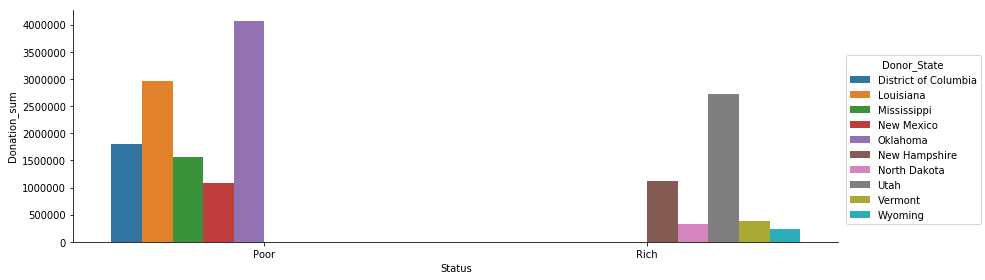

In [99]:
sns.factorplot(x='Status', y='Donation_sum',hue='Donor_State', data=donation_graph, \
               kind='bar',aspect=3)


### Looks like poor states get higher total donation amount compared to rich states

### Lets analyze rich and poor states donation count.

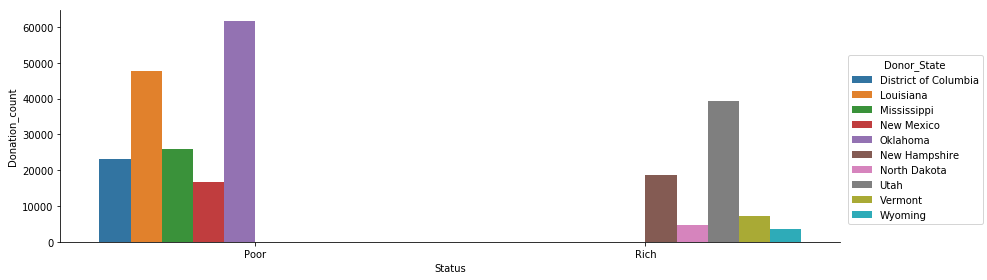

In [100]:
sns.factorplot(x='Status', y='Donation_count',hue='Donor_State', data=donation_graph, \
               kind='bar',aspect=3)

### Looks like poor states get higher number of donations compared to rich states

### Lets analyze based on the number of projects requested by these states.

<Figure size 1080x1080 with 0 Axes>

Text(124938,0.747653,'California')

Text(2807,0.773278,'New Hampshire')

Text(891,0.740648,'North Dakota')

Text(12037,0.709478,'Utah')

Text(986,0.802932,'Vermont')

Text(785,0.830688,'Wyoming')

Text(4712,0.846568,'District of Columbia')

Text(13762,0.694104,'Louisiana')

Text(7740,0.661652,'Mississippi')

Text(3998,0.765314,'New Mexico')

Text(19479,0.789007,'Oklahoma')

Text(0.5,0,'No of Projects')

Text(0.5,0,'No of Projects')

Text(0,0.5,'% Funded Projects')

Text(0.5,1,'Funded Projects By States')

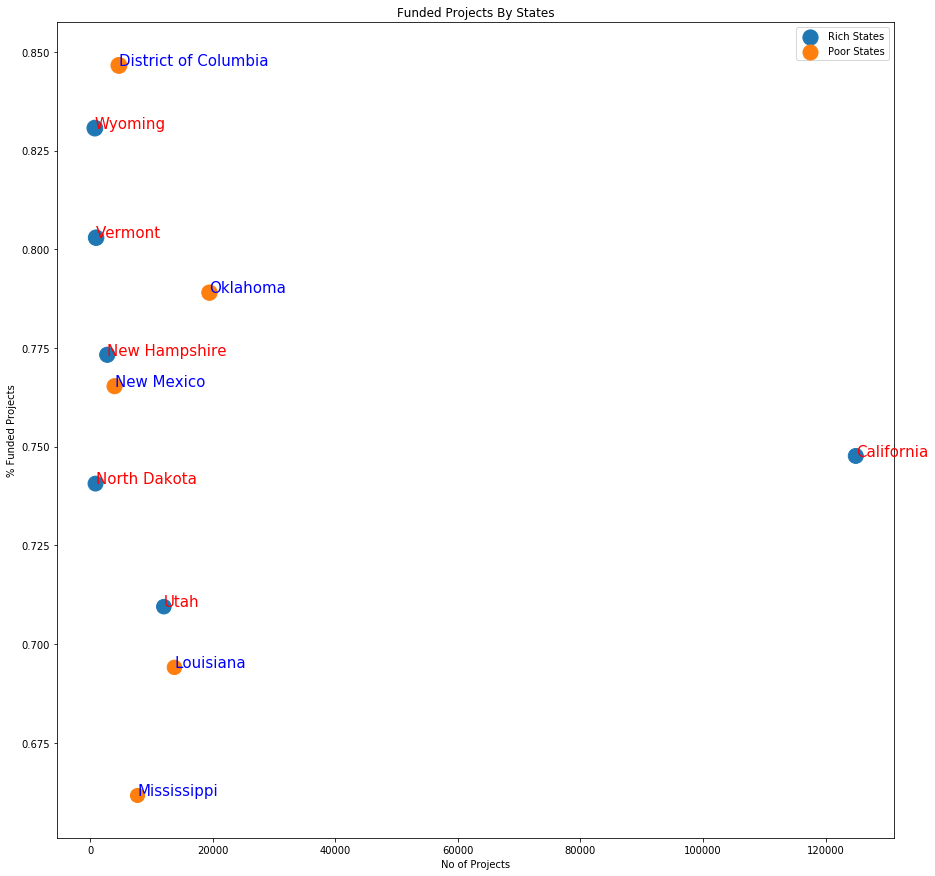

In [101]:
schools_sta=df_Projects[['School_ID','Project_Current_Status']].merge(df_Schools[['School_ID','School_State']],left_on='School_ID',right_on='School_ID',how='left')
sta_total=schools_sta.groupby('School_State')['Project_Current_Status'].count().reset_index()
sta_fund=schools_sta[schools_sta['Project_Current_Status']=='Fully Funded'].groupby('School_State')['Project_Current_Status'].count().reset_index()
sta_total=sta_total.merge(sta_fund,left_on='School_State',right_on='School_State',how='left')
sta_total.rename({'Project_Current_Status_x':'Total','Project_Current_Status_y':'Funded'},axis=1,inplace=True)
sta_total['%Funded']=(sta_total['Funded'])/sta_total['Total']
sta_total_rich = sta_total.loc[(sta_total['School_State'] == 'California') |  (sta_total['School_State'] == 'New Hampshire') | (sta_total['School_State'] == 'North Dakota') | (sta_total['School_State'] == 'Utah') | (sta_total['School_State'] == 'Vermont') | (sta_total['School_State'] == 'Wyoming')]
sta_total_poor = sta_total.loc[(sta_total['School_State'] == 'District of Columbia') | (sta_total['School_State'] == 'Mississippi') | (sta_total['School_State'] == 'Louisiana') | (sta_total['School_State'] == 'New Mexico') | (sta_total['School_State'] == 'Oklahoma') ]
plt.figure(figsize=(15,15))
plt.scatter('Funded','%Funded',data=sta_total_rich,s=sta_total_rich['%Funded']* 300,label = 'Rich States')
plt.scatter('Funded','%Funded',data=sta_total_poor,s=sta_total_poor['%Funded']*300,label = 'Poor States')
for i in range(sta_total_rich.shape[0]):
    plt.text(sta_total_rich['Funded'].values[i],sta_total_rich['%Funded'].values[i],s=sta_total_rich['School_State'].values[i],color='r',size=15)
for i in range(sta_total_poor.shape[0]):
    plt.text(sta_total_poor['Funded'].values[i],sta_total_poor['%Funded'].values[i],s=sta_total_poor['School_State'].values[i],color='b',size=15)
plt.xlabel('No of Projects')
plt.xlabel('No of Projects')
plt.ylabel('% Funded Projects')
plt.title('Funded Projects By States')
plt.legend(loc='upper right')

In [102]:
## Number of projects among those states.
sta_total_rich.append(sta_total_poor).sort_values('Total')

,School_State,Total,Funded,%Funded
50,Wyoming,945,785,0.830688
34,North Dakota,1203,891,0.740648
45,Vermont,1228,986,0.802932
29,New Hampshire,3630,2807,0.773278
31,New Mexico,5224,3998,0.765314
8,District of Columbia,5566,4712,0.846568
24,Mississippi,11698,7740,0.661652
44,Utah,16966,12037,0.709478
18,Louisiana,19827,13762,0.694104
36,Oklahoma,24688,19479,0.789007


# Conclusion:

### As we found previously that poor state's total donation amount is higher compared to rich states though these poor states request less projects. People tend to donate more in these states schools as  the % free lunch is high that means resident of these state are economically poor and need projects to help them develop classroom quality to provide better education.


### The number of projects requested from poor states is low, total donation amount is also low compared to rest of the states in USA. But these poor states actually have high percentage of projects that got fully funded.


### Whereas, the rich states requests for more projects as students and parents have high expectations from schools in these states. But it looks like people dont tend to donate to these states as % of free lunch is low so the families are considered to be economically wealthy and don't require classrooms to be developed as they might be getting the best education already.


### Incase of California, though it has highest total donation amount, but only 75% of its projects are fully funded. This observation says that as the number of projects requested increases they dont get funded easily.

# Machine learning

### Preparing Data

In [103]:
ML_Schools = schools_give_lunch_state.merge(schools_count_give_lunch_state,left_on='School_State',right_on='School_State') 

In [104]:
ML_Schools.isnull().any()

School_State    False
mean            False
text            False
State Code      False
count           False
dtype: bool

In [105]:
## Considering only 2 features (Avg % free lunch and total schools)
X= ML_Schools.loc[:,['count','mean']]

In [106]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X= sc_X.fit_transform(X)

In [107]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
for k in range(2,6):
    print ('k= %d ' % k)
    clus = [KMeans(n_clusters=k), Birch(n_clusters=k), AgglomerativeClustering(n_clusters=k)]
    #clus = [KMeans(n_clusters=k,n_jobs=-1)]
    for cl in clus:
        res = cl.fit(X)
        sil = metrics.silhouette_score(X, res.labels_)
        print (str(cl)[:6] + ' with k=' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl
            bestK = k
print('***********************************************')
print ('Best algorithm is... ' + str(bestCl)[:6] + '  with k=' +str(bestK) )
print('**********************')
print ('With Silhouette Score ' + str(bestSil))

k= 2 
KMeans with k=2: 0.4115
Birch( with k=2: 0.6609
Agglom with k=2: 0.4354
k= 3 
KMeans with k=3: 0.4223
Birch( with k=3: 0.4543
Agglom with k=3: 0.4505
k= 4 
KMeans with k=4: 0.4157
Birch( with k=4: 0.3036
Agglom with k=4: 0.3341
k= 5 
KMeans with k=5: 0.4112
Birch( with k=5: 0.2476
Agglom with k=5: 0.3333
***********************************************
Best algorithm is... Birch(  with k=2
**********************
With Silhouette Score 0.6609027518665487


In [108]:
from scipy import loadtxt
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

In [109]:
X= ML_Schools.loc[:,['count','mean']]

In [110]:
brc = Birch(threshold=1000)

In [111]:
brc.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
   threshold=1000)

Text(0,0.5,'Avg % of free lunch/reduced lunch')

Text(0.5,0,'Number of schools in the state')

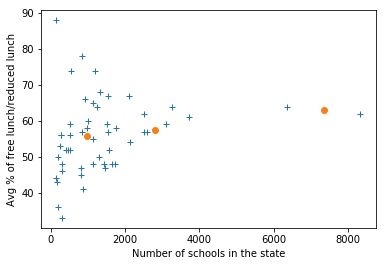

In [112]:
c = brc.subcluster_centers_
plt.plot(X['count'],X['mean'], '+')
plt.plot(c[:,0], c[:,1], 'o')
plt.ylabel('Avg % of free lunch/reduced lunch')
plt.xlabel('Number of schools in the state')
plt.show()

# Managerial insights:

**Based on our results we can recommend the following:**

- As the poor states have high probability of getting funded, they have to request more projects to get more donations.

# Insight 3: Seasonality pattern for donations

### Data Preparation steps:

In [113]:
df_Projects_Time = df_Projects
df_Donations_Time = df_Donations

In [114]:
df_Donations_Time.head(1)

,Project_ID,Donation_ID,Donor_ID,Donation_Amount,Donor_Cart_Sequence,Donation_Received_Date,Optional_Donation,Year,Month,Date,Day
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,178.37,11,2016-08-23 13:15:57,0.0,2016,8,23,Tuesday


In [115]:
df_Projects_Time.head(1)

,Project_ID,School_ID,Teacher_ID,Teacher_Project_Posted_Sequence,Project_Type,Project_Title,Project_Essay,Project_Short_Description,Project_Need_Statement,Project_Subject_Category_Tree,Project_Subject_Subcategory_Tree,Project_Grade_Level_Category,Project_Resource_Category,Project_Cost,Project_Posted_Date,Project_Expiration_Date,Project_Current_Status,Project_Fully_Funded_Date,Cleaned_Project_Title
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.8,2013-01-01,2013-05-30,Fully Funded,2013-01-11,stand bullying


In [116]:
## Extracting the datetime fields

df_Donations_Time['Received Date'] = pd.to_datetime(df_Donations_Time['Donation_Received_Date'])
df_Donations_Time['Received hour'] = df_Donations_Time['Received Date'].dt.hour
df_Donations_Time['Received Day'] = df_Donations_Time['Received Date'].dt.weekday
df_Donations_Time['Received Quarter'] = df_Donations_Time['Received Date'].dt.quarter
df_Donations_Time['Received Month'] = df_Donations_Time['Received Date'].dt.month

df_Projects_Time['Posted Date'] = pd.to_datetime(df_Projects_Time['Project_Posted_Date'])

df_Projects_Time['Posted Year'] = df_Projects_Time['Posted Date'].dt.year
df_Projects_Time['Posted Month'] = df_Projects_Time['Posted Date'].dt.month
df_Projects_Time['Posted Day'] = df_Projects_Time['Posted Date'].dt.weekday
df_Projects_Time['Posted Quarter'] = df_Projects_Time['Posted Date'].dt.quarter
df_Projects_Time['Posted hour'] = df_Projects_Time['Posted Date'].dt.hour

df_Projects_Time['Funded Date'] = pd.to_datetime(df_Projects_Time['Project_Fully_Funded_Date'])
df_Projects_Time['Funded Year'] = df_Projects_Time['Funded Date'].dt.year
df_Projects_Time['Funded Month'] = df_Projects_Time['Funded Date'].dt.month
df_Projects_Time['Funded Day'] = df_Projects_Time['Funded Date'].dt.weekday
df_Projects_Time['Funded Quarter'] = df_Projects_Time['Funded Date'].dt.quarter
df_Projects_Time['Funded hour'] = df_Projects_Time['Funded Date'].dt.hour
df_Projects_Time['Funding Time'] = df_Projects_Time['Funded Date'] - df_Projects_Time['Posted Date']
df_Projects_Time['Funding Time']=df_Projects_Time['Funding Time'].dt.days

## Let us consider only fully funded projects and see how long does it take from the day its posted to fully funded.

In [117]:
funded_time=df_Projects[df_Projects['Project_Current_Status']=='Fully Funded']

<Figure size 1296x432 with 0 Axes>

Text(0.5,0,'Days')

Text(0,0.5,'Number of projects')

Text(0.5,1,'Distribution of time for Full Project Funding')

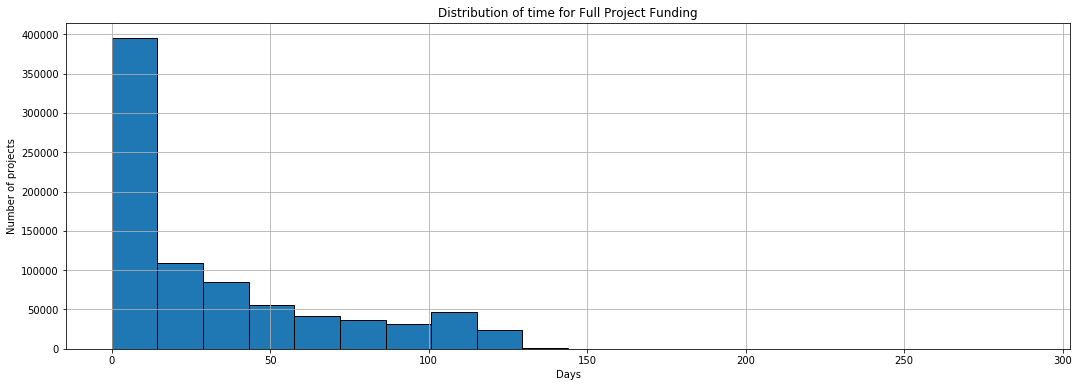

In [118]:
plt.figure(figsize=(18,6))
funded_time['Funding Time'].hist(bins=20,edgecolor='black')
plt.xlabel('Days')
plt.ylabel('Number of projects')
plt.title('Distribution of time for Full Project Funding')

**Taking fully funded projects for the distribution. As we can see, majority of the projects(above 62% of total funded projects) get funded within 20-30 days i.e within a month. The maximum number of days that a project took to get funded is 238.**



## Posted Month vs Donation recieved Month



In [119]:
t1 = df_Projects['Posted Month'].value_counts()
t2 = df_Donations_Time['Received Month'].value_counts()

mappq = {1.0:'January',2.0:'Feburary',3.0:'March',4.0:'April',5.0:'May',6.0:'June',7.0:'July',8.0:'August',9.0:'September',10.0:'October',\
        11.0:'November',12.0:'December'}

##mappq = {1.0:'Quarter 1',2.0:'Quarter 2',3.0:'Quarter 3',4.0:'Quarter 4'}
values1 = t1.values 
index1 = t1.index
index1 = [mappq[x] for x in index1]

values2 = t2.values 
index2 = t2.index
index2 = [mappq[x] for x in index2]
tmap = {}
for j, b in enumerate(index2):
    tmap[b] = values2[j]
# print (tmap)
# print index1
values2_c = [tmap[c] for c in index1]
# print values2_c
domain1 = {'x': [0.2, 0.50], 'y': [0.0, 0.33]}
domain2 = {'x': [0.8, 0.50], 'y': [0.0, 0.33]}


fig = {
  "data": [
    {
      "values": values1,
      "labels": index1,
      "domain": {"x": [0, .48]},
        "marker" : dict(colors=["#f77b9c" ,'#ab97db',  '#b0b1b2', "#efbc56", "#81a7e8", "#e295d0"]),
      "name": "PostedDay",
#       "hoverinfo":"label+percent+name",
      "hole" : .5,
        'pull': .05,
#             "textinfo" : "text",
      "type": "pie"
    },
    {
      "values": values2_c,
      "labels": index1,
        "marker" : dict(colors=["#f77b9c" ,'#ab97db',  '#b0b1b2', "#efbc56", "#81a7e8", "#e295d0"]),
      "domain": {"x": [.52, 1]},
#         "text":"CO2",
      "textposition":"inside",
      "name": "FundedDay",
#         "text" : values2,
#         "textinfo" : "text",
        "hole" : .5,
        'pull': .05,
      "type": "pie"
    }],
  "layout": {
#         "title":"Project Type and Project Status",
      "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Posted",
                "x": 0.2,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Donations",
                "x": 0.8,
                "y": 0.5
            }
        ]
    
    }
}
iplot(fig, filename='donut')

### Similar to previous graph on projects posting, the months of August and September have higher amount of donations. As we saw earlier that most projects get funded in less than a month. More projects are posted in August and September, and they funded within those months itself. while least number of donations are received in the month of June and month of May Probably the summers and vacation time.

# Lets check if special occasions affect funding

### As december also get higher amount of donations, lets analyze the trend in december.

In [120]:
df_month_trend = df_Donations_Time.groupby(['Date','Month'])['Donation_Amount'].count().to_frame().reset_index()

In [121]:
df_dec = df_month_trend.loc[(df_month_trend['Month'] == 12),['Date','Donation_Amount']]

In [122]:
df_dec.head()

,Date,Donation_Amount
11,1,20143
23,2,20816
35,3,17627
47,4,15348
59,5,15074


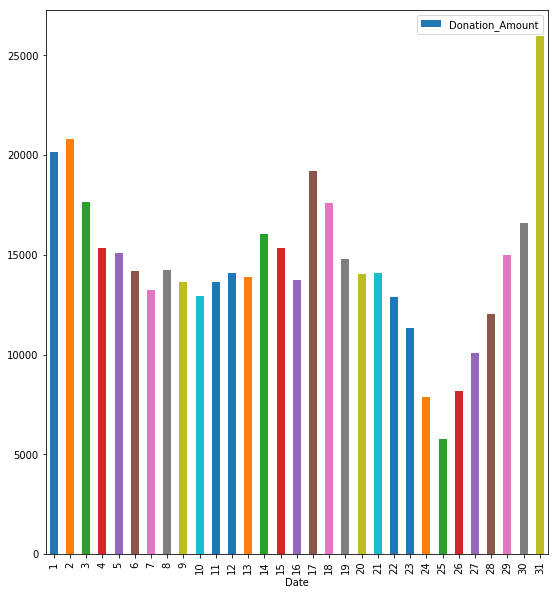

In [123]:
df_dec.plot(kind='bar',x ='Date',y ='Donation_Amount',figsize=(9,10))

### Before and after christmas the donations are high, especially on New year eve the donations are very high.

## Posted day vs donation recieved day

### lets analyze which day in a week gets hight amount of donations.


In [124]:
t1 = df_Projects['Posted Day'].value_counts()
t2 = df_Donations_Time['Received Day'].value_counts()

mapp = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
values1 = t1.values 
index1 = t1.index
index1 = [mapp[x] for x in index1]

values2 = t2.values 
index2 = t2.index
index2 = [mapp[x] for x in index2]
tmap = {}
for j, b in enumerate(index2):
    tmap[b] = values2[j]
# print (tmap)
# print index1
values2_c = [tmap[c] for c in index1]
# print values2_c
domain1 = {'x': [0.2, 0.50], 'y': [0.0, 0.33]}
domain2 = {'x': [0.8, 0.50], 'y': [0.0, 0.33]}


fig = {
  "data": [
    {
      "values": values1,
      "labels": index1,
      "domain": {"x": [0, .48]},
        "marker" : dict(colors=["#f77b9c" ,'#ab97db',  '#b0b1b2', "#efbc56", "#81a7e8", "#e295d0"]),
      ##"name": "PostedDay",
      "hoverinfo":"label+percent+name",
        "hole": .5,
        'pull': .05,
      
#             "textinfo" : "text",
      "type": "pie"
    },
    {
      "values": values2_c,
      "labels": index1,
        "marker" : dict(colors=["#f77b9c" ,'#ab97db',  '#b0b1b2', "#efbc56", "#81a7e8", "#e295d0"]),
      "domain": {"x": [.52, 1]},
#         "text":"CO2",
   ##   "textposition":"inside",
  ##    "name": "FundedDay",
#         "text" : values2,
#         "textinfo" : "text",
        "hole" : .5,
        'pull': .05,
      "type": "pie"
    }],
  "layout": {
   "title":"PostedDay vs FundedDay",
     "annotations": [
            {
                "font": {
                   "size": 20
               },
               "showarrow": False,
               "text": "PostedDay",
               "x": 0.17,
                "y": 0.5
            },
            {
                "font": {
                   "size": 20
               },
                "showarrow": False,
              "text": "Recieved day",
                "x": 0.83,
               "y": 0.5
           }
        ]
    
    }
}
iplot(fig, filename='donut')


### Teachers generally post projects on weekends and every monday there is more donations coming.

## Donation peak hours time

<BarContainer object of 24 artists>

([<matplotlib.axis.XTick at 0x1b27b5dc88>,
 <a list of 24 Text xticklabel objects>)

Text(0.5,0,'Hours')

Text(0,0.5,'Donation Amount($M)')

Text(0.5,1,'Peak hours of Donation')

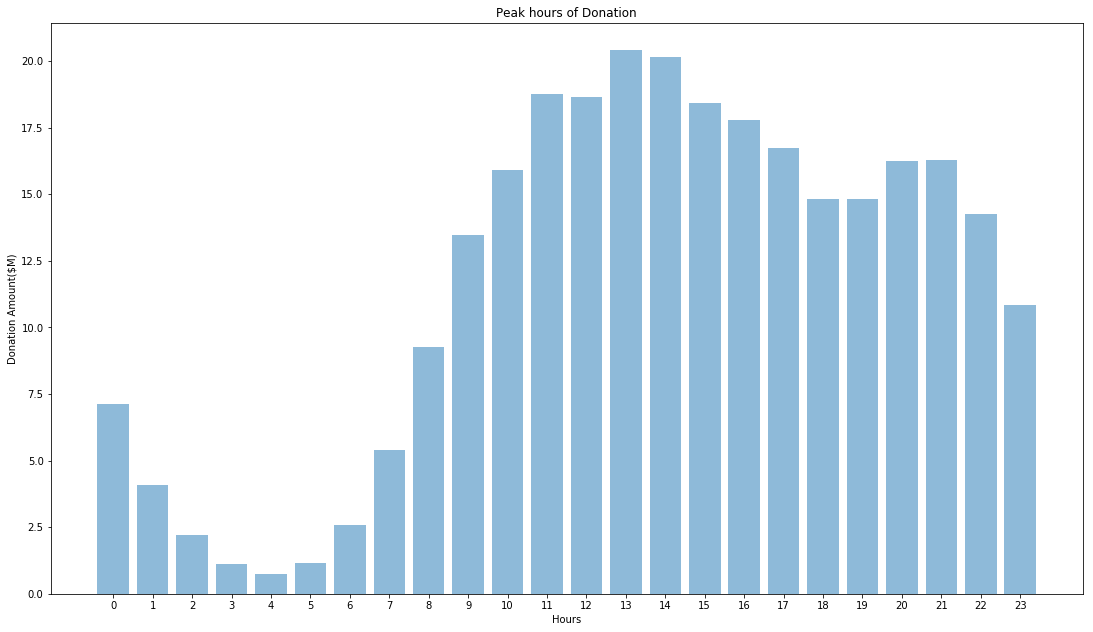

In [125]:
pk_hrs = df_Donations_Time.groupby("Received hour")["Donation_Amount"].sum().reset_index()

objects = pk_hrs['Received hour']
Amount = pk_hrs['Donation_Amount'] * 0.000001 

y_pos = np.arange(len(objects))

plt.bar(y_pos,Amount,align = 'center',alpha = 0.5)
plt.xticks(y_pos,objects)

plt.xlabel("Hours")
plt.ylabel("Donation Amount($M)")
plt.title("Peak hours of Donation")

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)


pylab.show()



**It is observed that peak hours for donations are from morning 10'O clock to evening 5'O clock**

# Conclusion:

### Best months to post a project to be full funded is August and September.
### Best Days to post a project is weekends ( Friday,Saturday and Sunday)


# Machine learning

### Preparing data:

In [126]:
df = df_Projects_Time.loc[:,['Project_ID','Project_Type','Project_Grade_Level_Category','Posted Month','Posted Day','Project_Current_Status','Project_Cost']]

In [127]:
## Train set contains only fully funded and expired projects
df_train = df.loc[(df['Project_Current_Status'] == 'Fully Funded') |(df['Project_Current_Status'] == 'Expired') ]

In [128]:
df_train.head()

,Project_ID,Project_Type,Project_Grade_Level_Category,Posted Month,Posted Day,Project_Current_Status,Project_Cost
0,7685f0265a19d7b52a470ee4bac883ba,Teacher-Led,Grades PreK-2,1,1,Fully Funded,361.80
1,f9f4af7099061fb4bf44642a03e5c331,Teacher-Led,Grades PreK-2,1,1,Expired,512.85
2,afd99a01739ad5557b51b1ba0174e832,Teacher-Led,Grades PreK-2,1,1,Fully Funded,435.92
3,c614a38bb1a5e68e2ae6ad9d94bb2492,Teacher-Led,Grades 3-5,1,1,Fully Funded,161.26
4,ec82a697fab916c0db0cdad746338df9,Teacher-Led,Grades 3-5,1,1,Fully Funded,264.19


In [129]:
df_train.drop(columns = 'Project_ID',inplace=True)

In [130]:
## Status if project binary values
df_train['Status'] = df_train.Project_Current_Status.replace({'Fully Funded':1.0, 'Expired':0.0})

In [131]:
df_train.drop(columns = 'Project_Current_Status',inplace=True)

In [132]:
df_graph = df_train

In [133]:
## Create dummies for quarter and Day
Quarter = pd.get_dummies(df_train['Posted Month'])
Day = pd.get_dummies(df_train['Posted Day'])
Grade_Level = pd.get_dummies(df_train['Project_Grade_Level_Category'])
Type = pd.get_dummies(df_train['Project_Type'])

In [134]:
df_train.drop(['Posted Month','Posted Day','Project_Grade_Level_Category','Project_Type'],axis=1,inplace=True)

In [135]:
df_train = pd.concat([df_train,Quarter,Day,Type,Grade_Level],axis=1)

In [136]:
data_final = df_train

In [137]:
## checking for any nan values
df_train.isna().any()

Project_Cost                False
Status                      False
1                           False
2                           False
3                           False
4                           False
5                           False
6                           False
7                           False
8                           False
9                           False
10                          False
11                          False
12                          False
0                           False
1                           False
2                           False
3                           False
4                           False
5                           False
6                           False
Professional Development    False
Student-Led                 False
Teacher-Led                 False
Grades 3-5                  False
Grades 6-8                  False
Grades 9-12                 False
Grades PreK-2               False
unknown                     False
dtype: bool

**Using logistic Regression:**

In [138]:
## Split the data set into test and train(30%,70%)
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Status',axis=1), 
                                                    df_train['Status'], test_size=0.30, 
                                                    random_state=101)

In [139]:
## fitting the regression model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
predictions = logmodel.predict(X_test)

In [141]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.50      0.04      0.07     72275
        1.0       0.78      0.99      0.87    248171

avg / total       0.72      0.77      0.69    320446



In [142]:
## Checking accuracy of the prediction model.
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7745361152893155

In [143]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=0,shuffle=True)
modelCV = LogisticRegression()
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))


10-fold cross validation average accuracy: 0.675


In [144]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[  2550  69725]
 [  2524 245647]]


233217 + 4864 correct predictions and 64483 + 4095 wrong predictions



## Using KNN Classification

In [145]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [146]:
X_train_std

array([[ 1.20757926,  3.22192447, -0.29020586, ..., -0.36938708,
        -0.79710029, -0.00633437],
       [-0.44945787, -0.31037351, -0.29020586, ..., -0.36938708,
         1.25454728, -0.00633437],
       [ 1.59322099, -0.31037351, -0.29020586, ..., -0.36938708,
         1.25454728, -0.00633437],
       ...,
       [-0.16397316, -0.31037351, -0.29020586, ..., -0.36938708,
         1.25454728, -0.00633437],
       [-0.45748247, -0.31037351, -0.29020586, ..., -0.36938708,
        -0.79710029, -0.00633437],
       [ 1.32555694, -0.31037351, -0.29020586, ..., -0.36938708,
        -0.79710029, -0.00633437]])

In [147]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_train_std,y_train)
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.7137688961050251

Coefficient: 
 [[-0.0006062   0.49501443  0.46991705  0.20288355  0.05972922 -0.27366687
  -0.34962842 -0.22525844 -0.02062956  0.14972052 -0.01595046  0.05856113
   0.54473624  0.22211301  0.18051358  0.19852853  0.15469068  0.16074963
   0.08257414  0.09625882  0.3969585   0.60401584  0.09445405  0.2166244
   0.25168896  0.39271962  0.23367716  0.00071825]]
Intercept: 
 [1.09542839]


In [148]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [149]:
k_pred= model2.predict(X_test)
print('Misclassified samples using KNN are: %d' %(y_test!=k_pred).sum())
print('Classification Accuracy of KNN is %.2f ' %accuracy_score(y_test,k_pred))

Misclassified samples using KNN are: 81586
Classification Accuracy of KNN is 0.75 


In [150]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = KNeighborsClassifier()
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.620


# Managerial insights:

**Based on our results we can recommend the following:**

- Teachers should post projects in the month of September and August.Also consider posting in december as people tend to be generous at that time.
- Best days to post projects to donors is on weekends.Donor trends donate on mondays between 10am-5pm.